# Scikit Learn

## 1) Import de dataset

In [284]:
from sklearn import datasets

In [285]:
cancer = datasets.load_breast_cancer()
iris = datasets.load_iris()

In [286]:
dataset = cancer

In [287]:
X = dataset.data
y = dataset.target

In [288]:
print dataset["DESCR"]

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

## 2) separer le jeu d'apprentissage du jeu de test

In [265]:
from sklearn.cross_validation import train_test_split


In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) Standardiser les valeurs

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
### exemple : Support Vector Machine

In [109]:
from sklearn import svm
algorithme = svm.SVC()
algorithme.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [110]:
from sklearn import cross_validation
cross_validation.cross_val_score(algorithme, X, y, n_jobs=-1)

array([ 0.52238806,  0.55223881,  0.54545455])

## 5) aller au delà des paramètres par défaut avec un grid search

In [111]:
from sklearn import grid_search
parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_.score(X_test, y_test)


0.94776119403 0.969696969697


## 5.1) affiner le grid search

In [112]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_

0.94776119403 SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [113]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.962686567164 SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [114]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.970149253731 SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# 6) tester tous les algorithmes

In [115]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print dir(sklearn)
    for nom_module in sklearn.__dict__['__all__']:    
        if verbose : print nom_module
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print " nom algorithme  = ", nom_fonction
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print e
        if verbose: print "="*30
    return algos

In [116]:
algos = get_sklearn_algorithms(True)
for key in algos.keys():
    print "\n===>",key
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print ",".join(algos_)

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__check_build', '__doc__', '__file__', '__name__', '__package__', '__path__', '__version__', '_isotonic', 'base', 'calibration', 'clone', 'cluster', 'covariance', 'cross_decomposition', 'cross_validation', 'datasets', 'decomposition', 'discriminant_analysis', 'dummy', 'ensemble', 'externals', 'feature_extraction', 'feature_selection', 'gaussian_process', 'grid_search', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'lda', 'learning_curve', 'linear_model', 'manifold', 'metrics', 'mixture', 'multiclass', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'qda', 'random_projection', 're', 'semi_supervised', 'setup_module', 'svm', 'sys', 'tree', 'utils', 'warnings']
calibration
 nom algorithme  =  CalibratedClassifierCV
 nom algorithme  =  IsotonicRegression
 nom algorithme  =  LabelBinarizer
 nom algorithme  =  LinearSVC
 nom algorithme  =  _CalibratedClassifier
 nom algorithme  =  _SigmoidCalibration
cluster
 

In [117]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [118]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print name
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print performance
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print "Algo de classification"
        else                : print str(e)[:50]
    print "="*30
    

Classifier implementing t
0.969696969697
Regression based on k-nea
0.886821994408
Kernel Density Estimation
-2390.03391376
Performs approximate near
'LSHForest' object has no attribute 'score'
Nearest centroid classifi
0.878787878788
Unsupervised learner for
'NearestNeighbors' object has no attribute 'score'
Classifier implementing a
Algo de classification
Regression based on neigh
Input contains NaN, infinity or a value too large 
Bernoulli Restricted Bolt
'BernoulliRBM' object has no attribute 'score'
Linear Discriminant Analy
0.893939393939
Kernel ridge regression.
-0.489815404888
Isomap Embedding

    Non
'Isomap' object has no attribute 'score'
Locally Linear Embedding
'LocallyLinearEmbedding' object has no attribute '
Multidimensional scaling
'MDS' object has no attribute 'score'
Spectral embedding for no
'SpectralEmbedding' object has no attribute 'score
t-distributed Stochastic
array must not contain infs or NaNs
Transforms lists of featu
'numpy.ndarray' object has no attribute

/Users/romain/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 40 iterations, alpha=7.249e-04, previous alpha=1.009e-04, with an active set of 25 regressors.
  ConvergenceWarning)
/Users/romain/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 38 iterations, alpha=2.882e-03, previous alpha=1.077e-04, with an active set of 25 regressors.
  ConvergenceWarning)
/Users/romain/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 40 iterations, alpha=3.388e-03, previous alpha=4.377e-05, with an active set of

'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
'RandomizedLogisticRegression' object has no attri
Linear least squares with
0.541096957989
Ridge regression with bui
0.661292878241
Classifier using Ridge re
0.909090909091
Ridge classifier with bui
0.954545454545
Linear classifiers (SVM,
0.954545454545
Linear model fitted by mi
0.678129733361
Theil-Sen Estimator
0.22841068861
CCA Canonical Correlation
0.102944741218
PLSCanonical implements
-7.35365245932
PLS regression

    PLSRe
0.69308475531
Partial Least Square SVD
'PLSSVD' object has no attribute 'score'
Label Propagation classif
0.939393939394
LabelSpreading model for
0.939393939394
An object for detecting o
0.424242424242
Maximum likelihood covari
-15.6379336308
Sparse inverse covariance
Non SPD result: the system is too ill-conditioned 
Sparse inverse covariance
-28.2172463906
LedoitWolf Estimator
-17.7901800019
Minimum Covariance Determ
-101.097383494
Oracle Approximating Shri
-16.5045309997
Covarianc

In [119]:
best_algorithm

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [120]:
performances

{'A Bagging classifier.': [0.90909090909090906],
 'A Bagging regressor.': [0.80316868592730661],
 'A decision tree classifie': [0.90909090909090906],
 'A decision tree regressor': [0.56943150046598312],
 'A random forest classifie': [0.95454545454545459],
 'A random forest regressor': [0.85483690587138861],
 'An AdaBoost classifier.': [0.93939393939393945],
 'An AdaBoost regressor.': [0.82780592504730433],
 'An extra-trees classifier': [0.98484848484848486],
 'An extra-trees regressor.': [0.88805219012115566],
 'An extremely randomized t': [0.81547064305684991],
 'An object for detecting o': [0.42424242424242425],
 'Bayesian ARD regression.': [0.65488535046968144],
 'Bayesian ridge regression': [0.6679581258081333],
 'C-Support Vector Classifi': [0.95454545454545459],
 'CCA Canonical Correlation': [0.10294474121830088],
 'Classifier implementing t': [0.96969696969696972],
 'Classifier using Ridge re': [0.90909090909090906],
 'Cross-validated Lasso, us': [0.6798938624946691],
 'Cross-va

In [121]:
import pandas as pd
df = pd.DataFrame(performances).T

In [122]:
col_name = "performance"
df.columns = [col_name]

In [123]:
df = df.sort_values(col_name)

In [124]:
df

,performance
CCA Canonical Correlation,0.102945
Passive Aggressive Regres,0.222907
Theil-Sen Estimator,0.228411
RANSAC (RANdom SAmple Con,0.282070
Ordinary least squar,0.381514
An object for detecting o,0.424242
Linear Support Vector Reg,0.428185
Linear least squares with,0.541097
Cross-validated Least Ang,0.559725
A decision tree regressor,0.569432


In [125]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [126]:
df = df.drop("gains", axis=1)

In [127]:
df

,performance
CCA Canonical Correlation,0.102945
Passive Aggressive Regres,0.222907
Theil-Sen Estimator,0.228411
RANSAC (RANdom SAmple Con,0.282070
Ordinary least squar,0.381514
An object for detecting o,0.424242
Linear Support Vector Reg,0.428185
Linear least squares with,0.541097
Cross-validated Least Ang,0.559725
A decision tree regressor,0.569432


In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

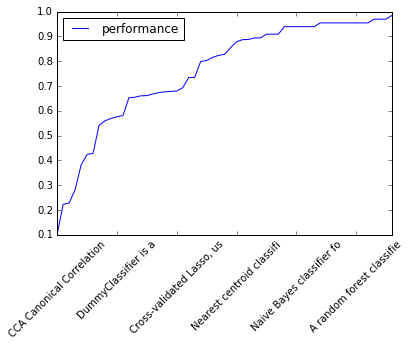

In [129]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

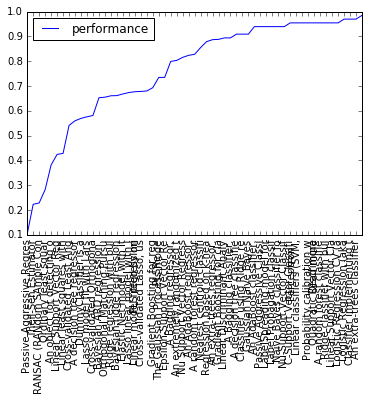

In [130]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

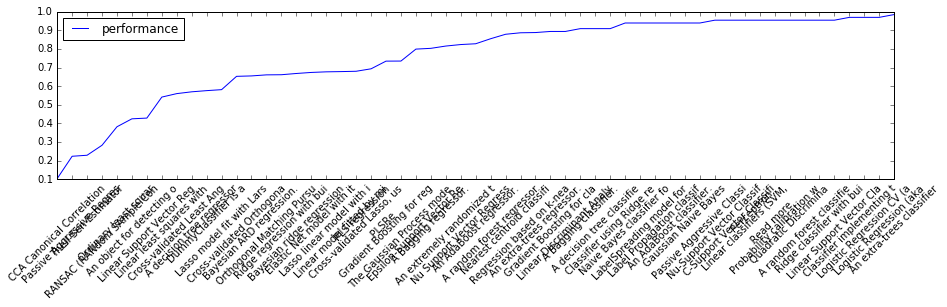

In [131]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(15,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


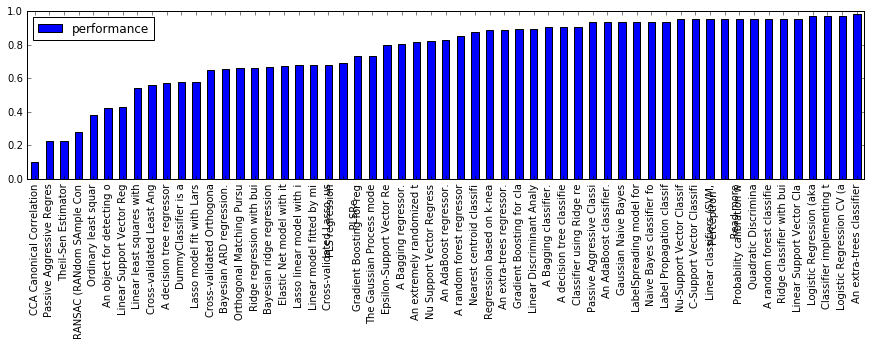

In [132]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(15,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

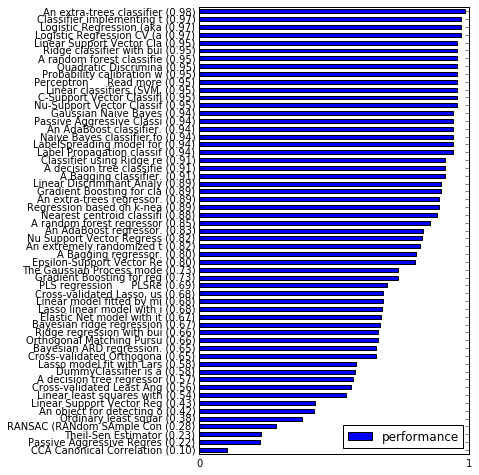

In [133]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

# 7) which scoring function ?

In [236]:
from sklearn.metrics import precision_recall_curve

In [237]:
from sklearn.metrics import roc_curve

# 8) tester les métriques sur un algo

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet, BayesianRidge

# 8.1) l'algo a des performances variables

In [290]:
performances = {}
algorithme = RandomForestClassifier()
for i in range(8):
    modele      = algorithme.fit(X_train, y_train)
    performance = modele.score(   X_test, y_test)
    print i, performance
    performances[i] = [performance]

0 0.989361702128
1 0.984042553191
2 0.994680851064
3 0.989361702128
4 0.984042553191
5 0.989361702128
6 0.989361702128
7 0.989361702128


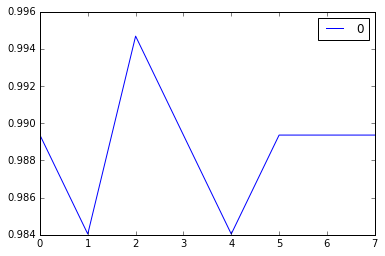

In [291]:
pd.DataFrame.from_dict(performances).T.plot()

# 9) Taux d'erreur sur probabilité d'appartenance à une classe

In [295]:
y_pred = modele.predict_proba(X_test)
for i in y_pred[:30]:
    print i,

[ 0.  1.] [ 0.  1.] [ 0.1  0.9] [ 0.1  0.9] [ 1.  0.] [ 1.  0.] [ 1.  0.] [ 0.8  0.2] [ 0.  1.] [ 0.2  0.8] [ 0.  1.] [ 0.3  0.7] [ 0.  1.] [ 1.  0.] [ 0.  1.] [ 1.  0.] [ 0.6  0.4] [ 0.2  0.8] [ 0.9  0.1] [ 0.  1.] [ 1.  0.] [ 0.  1.] [ 0.  1.] [ 0.9  0.1] [ 0.1  0.9] [ 0.  1.] [ 0.9  0.1] [ 0.  1.] [ 0.  1.] [ 0.5  0.5]


In [296]:
y_pred[:, 1][:30]

array([ 1. ,  1. ,  0.9,  0.9,  0. ,  0. ,  0. ,  0.2,  1. ,  0.8,  1. ,
        0.7,  1. ,  0. ,  1. ,  0. ,  0.4,  0.8,  0.1,  1. ,  0. ,  1. ,
        1. ,  0.1,  0.9,  1. ,  0.1,  1. ,  1. ,  0.5])

In [298]:
y_test[:30]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1])

# Le taux d'erreur dépend du seuil de choix de basculement vers 1 ou 0

In [273]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [274]:
def bascule(y_pred, seuil):
    return map(lambda prediction : 0 if prediction < seuil   else 1, y_pred)

In [275]:
prediction_selon_seuil = bascule(y_pred[:, 1], 0.5)
print confusion_matrix(prediction_selon_seuil, y_test)
print prediction_selon_seuil

[[ 73   1]
 [  1 113]]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]


In [276]:
def draw_confusion_matrix(y_test, predictions, title):
    from sklearn.metrics import confusion_matrix,accuracy_score
    import matplotlib.pyplot as plt
    cm    = confusion_matrix(y_test, predictions)
    accur = accuracy_score  (y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for [%s]'%(accur,title))
    plt.colorbar ()
    plt.show     ()

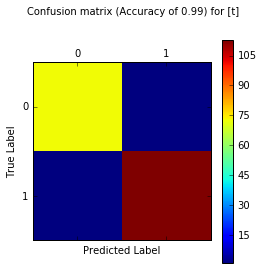

In [277]:
draw_confusion_matrix(y_test, prediction_selon_seuil, "t")

# Comment tester tous les seuils ? 
# Avec la courbe ROC

In [278]:
taux_de_faux_positif, taux_de_vrai_positifs, seuils =  roc_curve(y_test, y_pred[:, 1])

In [299]:
seuils

array([ 1. ,  0.9,  0.8,  0.7,  0.5,  0.4,  0.3,  0.2,  0.1,  0. ])

In [300]:
taux_de_vrai_positifs

array([ 0.73684211,  0.85964912,  0.93859649,  0.99122807,  0.99122807,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [301]:
taux_de_faux_positif

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.01351351,
        0.02702703,  0.05405405,  0.09459459,  0.21621622,  1.        ])

In [302]:
auc_global = auc(taux_de_faux_positif, taux_de_vrai_positifs)
auc_global

0.99982219061166433

# Tracer la courbe ROC

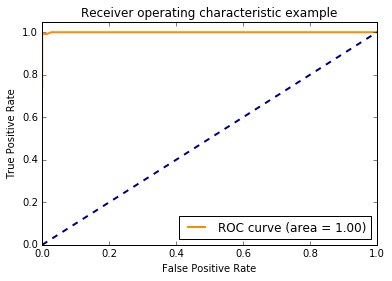

In [303]:
plt.figure()
lw = 2
plt.plot(taux_de_faux_positif, 
         taux_de_vrai_positifs, 
         color='darkorange',
         lw=lw, 
         label='ROC curve (area = %0.2f)' % auc_global)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# on s'intéresse en général à l'AUC (ici elle paraît trop belle)